<p style="font-family: Arial; font-size:16pt;color:Darkblue; font-style:bold"><br>
Classificação
<br>

*KNN* ... 

<p style="font-family: Arial; font-size:14pt;color:#2462C0; font-style:bold"><br>

Importação da biblioteca
</p>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

dataset = pd.read_csv(url, names=names)

In [25]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:
# todas as linhas e quase todas as colunas, menos a ultima.
# x contém as primeiras 4 colunas do dataset (atributos)
# y contém os labels

X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
Divide o dataset em 80% dados de treino e 20% dados de teste.
Do total de 150 linhas, o conjunto de treino tem 120 linhas e o conjunto de teste contém 30 linhas.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
y_pred = classifier.predict(X_test)

Avaliando o algoritmo

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, y_pred)

array([[12,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  7]], dtype=int64)

In [32]:
classification_report(y_test, y_pred)


u'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        12\nIris-versicolor       0.90      0.90      0.90        10\n Iris-virginica       0.88      0.88      0.88         8\n\n    avg / total       0.93      0.93      0.93        30\n'

Comparando o erro com o K

In [33]:
error = []

for i in range (1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

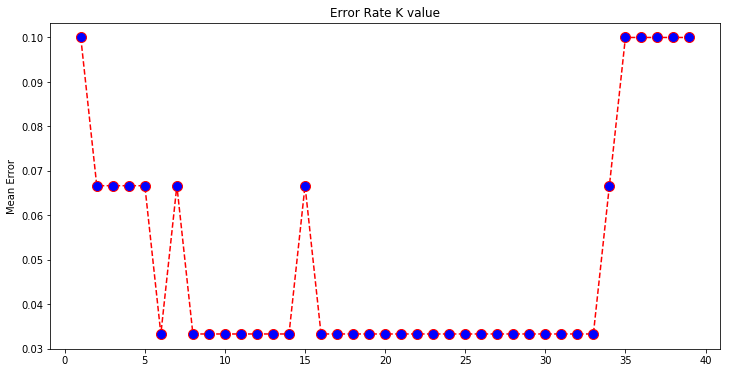

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K value')
plt.ylabel('Mean Error')